<a href="https://colab.research.google.com/github/felicia2602/study_case_03/blob/main/Case_study_03_Kelompok_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok D Data Mining (B)**

1. Abiel. A (2006532891)
2. Dwight H (2006571160)
3. Felicia (2006463976) 
4. Nisrina A (2006571072)
5. Nurrochmi Andina (2006571103)
6. Peksyaji (2006522322)
7. Yasmin K (2006571091)

In [64]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/felicia2602/study_case_03/main/assoc_rule.csv', sep=';')
df.sample(10)

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
38,12,2022-07-06 00:00:00,Mr. G,4,Sabun,Lifboy,2
22,7,2022-07-04 00:00:00,Mr. Z,9,Rokok,Malioboro,1
8,3,2022-07-02 00:00:00,Mr. C,4,Sabun,Lifboy,1
17,5,2022-07-03 00:00:00,Mr. A,10,Air Minum,Sprit,2
32,9,2022-07-05 00:00:00,Mr. X,11,Mie Instan,Indomi,2
50,17,2022-09-05 00:00:00,Mr. X,1,Roti,Sri Roti,2
53,17,2022-09-05 00:00:00,Mr. X,6,Snack,Chiki,2
28,9,2022-07-05 00:00:00,Mr. X,2,Air Minum,Aquos,1
6,2,2022-07-01 00:00:00,Mr. B,3,Roti,Prambanan,1
48,15,2022-07-08 00:00:00,Mr. F,9,Rokok,Malioboro,1


# Pre-Processing & Data Understanding


sebelum digunakan, akan dilakukan pre-processing dan data understanding terlebih dahulu.


In [68]:
#Akan di cek tipe data

df.dtypes

ID Transaksi     int64
Tanggal         object
Konsumen        object
ID Produk        int64
Nama Produk     object
Merek           object
Jumlah           int64
dtype: object

In [69]:
#Terdapat tipe data yang tidak sesuai yaitu Tanggal. Akan diubah tipe datanya menjadi datetime

df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [70]:
df['Nama Produk'].unique()

#akan dicari jenis-jenis nama produk yang tersedia

array(['Roti', 'Air Minum', 'Mie Instan', 'Snack', 'Shampoo', 'Sabun',
       'Rokok'], dtype=object)

In [71]:
df['Merek'].unique()

#akan dicari jenis-jenis merek yang tersedia

array(['Sri Roti', 'Aquos', 'Indomi', 'Mi Sedap', 'Chiki', 'Prambanan',
       'Clean', 'Lifboy', 'Malioboro', 'Sprit', 'Citata', 'Luks'],
      dtype=object)

Dari percobaan-percobaan yang kita lakukan, dapat kita simpulkan bahwa data yang diberikan oleh perusahaan Alfaindo: 
1. sudah cukup baik dan lengkap, karena tidak ditemukan adanya typo maupun data yang hilang pada kolom nama produk dan merek.
2. Hanya saja sampel data yang diberikan terlalu sedikit sehingga kemungkinan besar intepretasi yang dihasilkan tidak sesuai dengan kenyataan. Dan kami mendapati adanya beberapa kejanggalan dalam data, yaitu terdapat banyak sekali transaksi pada bulan 7 (Juli), akan tetapi terdapat minim transaksi pada bulan-bulan lainnya.


Kami juga melakukan asumsi bahwa pelanggan-pelanggan yang membeli di Alfaindo telah memiliki kartu membership Alfaindo.

In [72]:
basket = (df.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('ID Transaksi'))
basket.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1.0,2.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
# One hot encoding. Untuk melabeli apakah seorang pembeli membeli produk tersebut atau tidak (tidak dilihat jumlah frekuensi, hanya membeli produknya atau tidak)
basket_sets = basket.applymap(encode_units)
basket_sets.head(5)

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1


In [74]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
1,0.333333,(Mie Instan)
2,0.277778,(Rokok)
3,0.500000,(Roti)
4,0.444444,(Sabun)
5,0.333333,(Shampoo)
6,0.500000,(Snack)
7,0.166667,"(Air Minum, Mie Instan)"
8,0.111111,"(Air Minum, Rokok)"
9,0.444444,"(Air Minum, Roti)"


In [75]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head() #Melihat 5 data pertama untuk keperluan market basket analysis nantinya

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Roti, Snack, Mie Instan)","(Air Minum, Sabun)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
169,"(Sabun, Roti)","(Air Minum, Snack, Mie Instan)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
152,"(Air Minum, Snack, Mie Instan)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
162,"(Air Minum, Sabun)","(Roti, Snack, Mie Instan)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
84,"(Sabun, Roti)","(Air Minum, Mie Instan)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


# EDA (Exploratory Data Analysis)

#### **Jumlah *item* yang paling banyak dibeli**


Berikut akan dilihat menggunakan grafik batang untuk melihat jumlah *item* yang paling banyak dibeli oleh pembeli

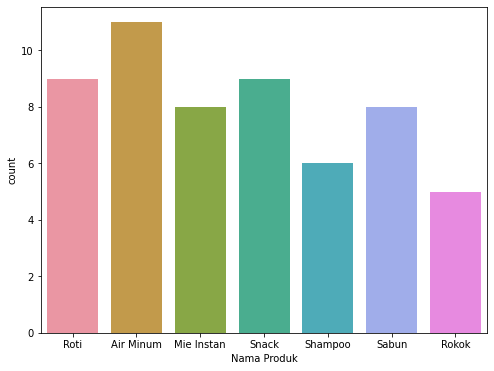

In [76]:
 #Melihat frekuensi pembelian produk

plt.figure(figsize=(8,6))
p = sns.countplot(x="Nama Produk", data=df)

* Dari *plot* di atas, dapat dilihat bahwa nama produk yang paling laku adalah Air minum. Oleh karena itu, dapat disarankan kepada AlfaIndo untuk menambahkan stock atau variasi merek dalam kategori produk tersebut.
* Dari *plot* diatas dapat dilihat bahwa mie instan dan sabun memiliki grafik batang yang similar dan memiliki angka *lift* yang tinggi, yang menandakan bahwa jika seseorang membeli mie instan maka besar kemungkinannya mereka juga akan membeli sabun dan berlaku sebaliknya. Sementara shampoo relatif sedikit untuk dibeli. Oleh karena itu, kami sarankan kepada Alfaindo untuk menempatkan produk shampoo berdekatan dengan produk sabun dengan harapan dapat meningkatkan penjualan shampoo. Selain itu, AlfaIndo juga dapat memberikan paket pembelian sabun dan shampoo sehingga diharapkan dapat meningkatkan penjualan shampoo.

#### **Jumlah *merk* yang paling banyak dibeli**

Berikut akan dilihat menggunakan grafik batang untuk melihat banyaknya *merk* yang terjual


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

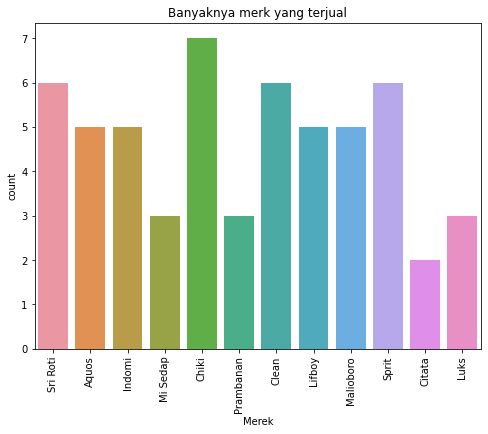

In [77]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="Merek",  data=df)
plt.title('Banyaknya merk yang terjual')
plt.xticks(rotation='vertical')



* Dari plot diatas, Kita dapat merekomendasikan Alfaindo untuk mengatur proporsi stok setiap tipe produk sesuai dengan "demand" merek yang paling sering dibeli oleh konsumen. Agar Alfaindo dapat menjaga efesiensi kesediaan stok mereka.
* Dari plot diatas, dapat dilihat bahwa untuk merek "Mi Sedap", "Luks", "Prambanan", dan "Citata" merupakan merek dengan penjualan yang tergolong rendah dibandingkan merek lain. Kita dapat merekomendasikan perusahaan Alfaindo untuk memberikan promo khusus, "bundle" murah, dan memindahkan merek-merek tersebut ke etalase khusus agar dapat lebih terlihat dan menarik konsumen.


#### **Jumlah frekuensi transaksi masing-masing konsumen**

berikut akan dilihat menggunakan grafik batang untuk melihat frekuensi transaksi oleh masing-masing konsumen

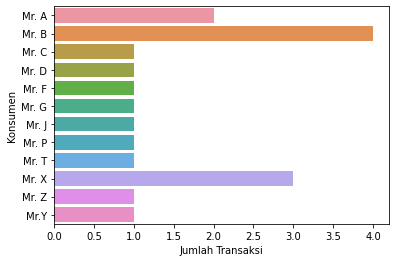

In [78]:
# melihat frekuensi transaksi masing-masing konsumen

df2 = df.groupby(['ID Transaksi','Konsumen'])['Jumlah'].sum().to_frame(name = 'Jumlah Barang yang Dibeli').reset_index()
df3 = df2.groupby('Konsumen')['ID Transaksi'].count().to_frame(name = 'Jumlah Transaksi').reset_index()
p = sns.barplot(x = 'Jumlah Transaksi', y = 'Konsumen', data = df3)

* Dari plot di atas, dapat dilihat bahwa dalam kurun waktu 3 bulan, Mr. B dan Mr. X merupakan 2 pelanggan Alfaindo yang paling banyak frekuensi transaksinya dibandingkan dengan pelanggan yang lain. Oleh karena itu, berdasarkan output diatas kami menyarankan PT. Alfaindo untuk menambahkan fitur cashback sebagai bonus yang didapatkan oleh membership PT. Alfaindo tersebut sehingga hal ini dapat meningkatkan loyalitas pelanggan.

#### **Jumlah frekuensi transaksi masing-masing konsumen**

berikut akan dilihat menggunakan grafik batang untuk melihat support dari produk-produk yang ada.

Text(0.5, 1.0, 'Support dari masing-masing produk')

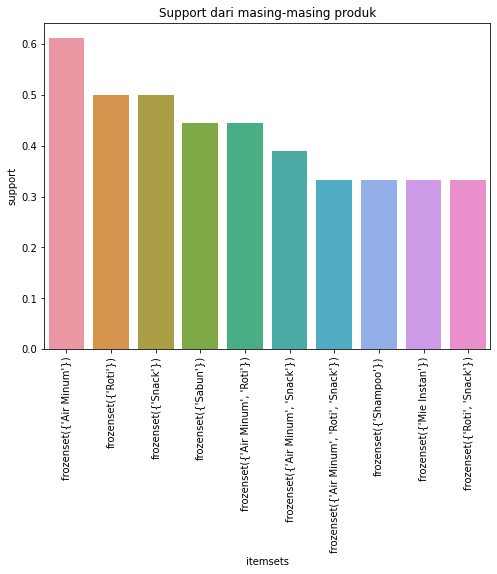

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(y="support", x="itemsets", data=frequent_itemsets.sort_values('support',ascending=False).head(10))
plt.xticks(rotation='vertical')
plt.title('Support dari masing-masing produk')

* Dari plot support produk di atas, dapat dilihat bahwa nama produk yang paling laku jika dibandingkan dengan seluruh total transaksi yang ada adalah air minum. Oleh karena itu, dapat disarankan kepada AlfaIndo untuk menambahkan stock atau variasi merek dalam kategori produk tersebut.
* Dari plot support produk diatas, dapat dilihat bahwa frekuensi pembelian shampoo relatif lebih rendah dibandingkan dengan frekuensi banyaknya pembelian sabun jika dibandingkan dengan seluruh total transaksi yang ada. Oleh karena itu, kami sarankan kepada Alfaindo untuk menempatkan produk shampoo berdekatan dengan produk sabun dengan harapan dapat meningkatkan penjualan shampoo. Selain itu, AlfaIndo juga dapat memberikan paket pembelian sabun dan shampoo sehingga diharapkan dapat meningkatkan penjualan shampoo.

# Market Basket Analysis

## Market Basket Analysis untuk Produk

In [80]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
1,0.333333,(Mie Instan)
2,0.277778,(Rokok)
3,0.500000,(Roti)
4,0.444444,(Sabun)
5,0.333333,(Shampoo)
6,0.500000,(Snack)
7,0.166667,"(Air Minum, Mie Instan)"
8,0.111111,"(Air Minum, Rokok)"
9,0.444444,"(Air Minum, Roti)"


In [81]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Roti, Snack, Mie Instan)","(Air Minum, Sabun)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
169,"(Sabun, Roti)","(Air Minum, Snack, Mie Instan)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
152,"(Air Minum, Snack, Mie Instan)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
162,"(Air Minum, Sabun)","(Roti, Snack, Mie Instan)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
84,"(Sabun, Roti)","(Air Minum, Mie Instan)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


In [82]:
# Filtering
rules[ (rules['lift'] >= 2) & (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Roti, Snack, Mie Instan)","(Air Minum, Sabun)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
152,"(Air Minum, Snack, Mie Instan)","(Sabun, Roti)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
122,"(Air Minum, Sabun)","(Roti, Snack)",0.166667,0.333333,0.166667,1.0,3.000000,0.111111,inf
154,"(Air Minum, Sabun, Mie Instan)","(Roti, Snack)",0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf
125,"(Sabun, Roti)","(Air Minum, Snack)",0.166667,0.388889,0.166667,1.0,2.571429,0.101852,inf
160,"(Sabun, Roti, Mie Instan)","(Air Minum, Snack)",0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
58,"(Mie Instan, Shampoo)",(Sabun),0.166667,0.444444,0.166667,1.0,2.250000,0.092593,inf
106,"(Air Minum, Snack, Mie Instan)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf
135,"(Roti, Snack, Mie Instan)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf
148,"(Air Minum, Roti, Snack, Mie Instan)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf


Dari output di atas, produk-produk yang dibeli secara bersamaan oleh customer terhadap asosiasi rule pada dataset dengan min_support 0.1, min_threshold = 1, dan nilai lift lebih dari sama dengan 1 serta tingkat confidence minimal sebesar 0.8 adalah:
* snack, air minum, mie instan dengan sabun, roti.
* sabun, air minum dengan snack, roti.
* snack, mi instan dengan sabun
* shampoo, mi instan dengan sabun

Sehingga kami dapat menyarankan untuk meletakkan produk sabun berjauhan dengan produk roti, mi instan, dan snack karena kemungkinan barang tersebut dibeli secara bersamaan oleh pelanggan cukup tinggi. Selain itu, produk-produk tersebut diletakkan berjauhan dengan produk air minum karena kemungkinan barang tersebut dibeli secara bersamaan juga cukup tinggi.

## Market Basket Analysis untuk merek

In [83]:
basket1 = (df.groupby(['ID Transaksi', 'Merek'])['Jumlah'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('ID Transaksi'))
basket1.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets1 = basket1.applymap(encode_units)
basket_sets1.head(5)

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0


In [85]:
frequent_itemsets1 = apriori(basket_sets1, min_support=0.1, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.277778,(Aquos)
1,0.388889,(Chiki)
2,0.111111,(Citata)
3,0.333333,(Clean)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
6,0.166667,(Luks)
7,0.277778,(Malioboro)
8,0.166667,(Mi Sedap)
9,0.166667,(Prambanan)


In [86]:
rules2 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aquos),(Chiki),0.277778,0.388889,0.166667,0.600000,1.542857,0.058642,1.527778
1,(Chiki),(Aquos),0.388889,0.277778,0.166667,0.428571,1.542857,0.058642,1.263889
2,(Aquos),(Indomi),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
3,(Indomi),(Aquos),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
4,(Aquos),(Lifboy),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
...,...,...,...,...,...,...,...,...,...
99,"(Chiki, Lifboy)","(Sri Roti, Aquos)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
100,(Sri Roti),"(Aquos, Chiki, Lifboy)",0.333333,0.111111,0.111111,0.333333,3.000000,0.074074,1.333333
101,(Aquos),"(Sri Roti, Chiki, Lifboy)",0.277778,0.111111,0.111111,0.400000,3.600000,0.080247,1.481481
102,(Chiki),"(Sri Roti, Aquos, Lifboy)",0.388889,0.111111,0.111111,0.285714,2.571429,0.067901,1.244444


In [87]:
resultss = rules2[(rules2['lift'] >= 1) & 
               (rules2['antecedent support'] < 0.2)]

apr_results2 = resultss.sort_values(by='lift', ascending=False)
apr_results2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,"(Aquos, Lifboy)","(Sri Roti, Chiki)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
95,"(Sri Roti, Chiki)","(Aquos, Lifboy)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
99,"(Chiki, Lifboy)","(Sri Roti, Aquos)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
96,"(Sri Roti, Lifboy)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
83,(Citata),"(Sri Roti, Sprit)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
94,"(Sri Roti, Aquos)","(Chiki, Lifboy)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
78,"(Sri Roti, Sprit)",(Citata),0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
97,"(Aquos, Chiki)","(Sri Roti, Lifboy)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
70,(Luks),"(Chiki, Clean)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000
67,"(Chiki, Clean)",(Luks),0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


In [88]:
apr_results2.loc[83]

antecedents                    (Citata)
consequents           (Sri Roti, Sprit)
antecedent support             0.111111
consequent support             0.166667
support                        0.111111
confidence                          1.0
lift                                6.0
leverage                       0.092593
conviction                          inf
Name: 83, dtype: object

# Kesimpulan dan Rekomendasi

KESIMPULAN:
* Produk yang paling banyak dibeli adalah produk air minum dengan merk Sprit
* Merk produk yang panyak dibeli adalah Chiki. Sementara  merk produk snack lainnya, yaitu Citata sangat relatif sedikit dibeli.
* Dalam satu jenis produk, terdapat merk yang frekuensi pembeliannya relatif timpang (frekuensi pembeliannya cukup jauh) yaitu produk snack dengan merk Chiki dan Citata, sabun dengan merk Lifboy dan Luks, mie instan dengan merk Indomi dan Mi Sedap
* Produk yang kemungkinannya tinggi untuk dibeli secara bersamaan oleh pelanggan adalah
1. snack, air minum, mie instan dengan sabun, roti.
2. sabun, air minum dengan snack, roti.
3. snack, mi instan dengan sabun
4. shampoo, mi instan dengan sabun

REKOMENDASI :
* Menempatkan produk shampoo berdekatan dengan produk sabun dengan harapan dapat meningkatkan penjualan shampoo
* Membuat paket produk sabun dan shampoo sehingga diharapkan dapat meningkatkan penjualan shampoo. 
* Menawarkan promo shampoo dalam bentuk sachet gratis setiap pembelian produk sabun.
* Memberikan fitur cashback sebagai bonus yang didapatkan oleh membership PT. alfaindo sehingga hal ini dapat meningkatkan loyalitas pelanggan.
* Membuat promo khusus "bundle" murah untuk merk Mi Sedap, Prambanan, dan Citata, atau memindahkan merk tersebut ke etalase khusus agar dapat lebih terlihat dan menarik konsumen.
* Mengatur proporsi stok produk snack dengan merk Citata sebagai merk produk yang relatif sedikit dibeli. Agar Alfaindo dapat menjaga efesiensi kesediaan stok mereka.
* Membuat paket produk dengan merk Sprit, Citata dan Sri Roti untuk meningkatkan penjualan CItata dikarenakan merk Sprit dan Sri Roti memiliki frekuensi pembelian yang relatif tinggi.
* Meletakkan produk sabun berjauhan dengan produk roti, mi instan, dan snack karena kemungkinan barang tersebut dibeli secara bersamaan oleh pelanggan cukup tinggi. Selain itu, produk-produk tersebut diletakkan berjauhan dengan produk air minum karena kemungkinan barang tersebut dibeli secara bersamaan juga cukup tinggi.